In [1]:
# Build training and testing dataset of assignment 1 to predict 
# the probability of a 
# survival of a person based on gender, age and passenger-class

### import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/mitu/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.16.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Import the dataset

In [3]:
df = sns.load_dataset('titanic')
#df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [4]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [5]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Separate the input and output data

In [6]:
x = df[['pclass','sex','age']]
y = df['survived']

### Label Encode the string data

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()

In [9]:
x['sex'] = le.fit_transform(x['sex'])

<ipython-input-9-b916ec63b458>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['sex'] = le.fit_transform(x['sex'])


In [10]:
x.shape

(891, 3)

In [11]:
x.isnull().sum()

pclass      0
sex         0
age       177
dtype: int64

In [12]:
x.fillna(method='pad', inplace=True)

/home/mitu/.local/lib/python3.8/site-packages/pandas/core/frame.py:4252: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [13]:
x.isnull().sum()

pclass    0
sex       0
age       0
dtype: int64

In [14]:
x.describe()

,pclass,sex,age
count,891.000000,891.000000,891.00000
mean,2.308642,0.647587,29.58156
std,0.836071,0.477990,14.55459
min,1.000000,0.000000,0.42000
25%,2.000000,0.000000,20.00000
50%,3.000000,1.000000,28.00000
75%,3.000000,1.000000,38.00000
max,3.000000,1.000000,80.00000


In [15]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [16]:
set(y)

{0, 1}

In [17]:
np.unique(y)

array([0, 1])

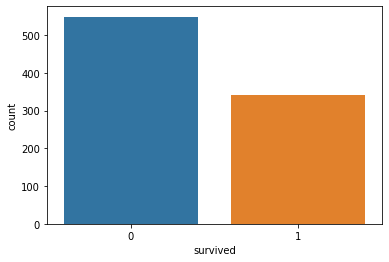

In [18]:
sns.countplot(x=y);

In [19]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [20]:
df['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='survived'>

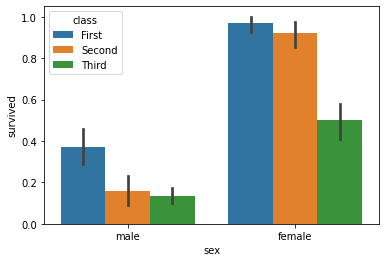

In [21]:
sns.barplot(x='sex', y='survived',data=df, hue='class')

In [22]:
x

,pclass,sex,age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0
...,...,...,...
886,2,1,27.0
887,1,0,19.0
888,3,0,19.0
889,1,1,26.0


In [23]:
x.describe()

,pclass,sex,age
count,891.000000,891.000000,891.00000
mean,2.308642,0.647587,29.58156
std,0.836071,0.477990,14.55459
min,1.000000,0.000000,0.42000
25%,2.000000,0.000000,20.00000
50%,3.000000,1.000000,28.00000
75%,3.000000,1.000000,38.00000
max,3.000000,1.000000,80.00000


### Normalization

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
x_scaled = scaler.fit_transform(x)

In [29]:
x_scaled

array([[ 0.82737724,  0.73769513, -0.52119766],
       [-1.56610693, -1.35557354,  0.57872934],
       [ 0.82737724, -1.35557354, -0.24621591],
       ...,
       [ 0.82737724, -1.35557354, -0.72743397],
       [-1.56610693,  0.73769513, -0.24621591],
       [ 0.82737724,  0.73769513,  0.16625671]])

In [30]:
pd.DataFrame(x_scaled).describe()

,0,1,2
count,8.910000e+02,8.910000e+02,8.910000e+02
mean,-8.772133e-17,-1.156327e-16,1.634807e-16
std,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.566107e+00,-1.355574e+00,-2.004724e+00
25%,-3.693648e-01,-1.355574e+00,-6.586885e-01
50%,8.273772e-01,7.376951e-01,-1.087250e-01
75%,8.273772e-01,7.376951e-01,5.787293e-01
max,8.273772e-01,7.376951e-01,3.466038e+00


In [31]:
x_scaled.shape

(891, 3)

### Cross-validation

In [33]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, random_state=0, test_size=0.25)

In [37]:
x_train.shape

(668, 3)

In [38]:
x_test.shape

(223, 3)

### Build the model

In [40]:
# Import the class
from sklearn.linear_model import LogisticRegression

In [41]:
# Create the object
clf = LogisticRegression()

In [42]:
# Train the algorithm
clf.fit(x_train, y_train)

LogisticRegression()

### Performance Evaluation

In [44]:
y_pred = clf.predict(x_test)

In [45]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1])

In [50]:
result = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})

In [51]:
result.shape

(223, 2)

In [54]:
sample = pd.DataFrame({
    'actual': [1,0,0,1,1,0,1,0,1,1],
    'predicted': [1,1,0,1,0,0,1,0,1,0]
})

In [61]:
sum(sample['actual'] == sample['predicted'])/len(sample)

0.7

In [62]:
sum(result['actual'] == result['predicted'])/len(result)

0.7802690582959642

In [64]:
x.columns

Index(['pclass', 'sex', 'age'], dtype='object')

In [65]:
import warnings
warnings.filterwarnings('ignore')

In [89]:
new1 = [[1, 0, 22]] 
new1 = scaler.transform(new1)

In [90]:
clf.predict_proba(new1)[0][1]

0.9339471287482389

In [91]:
clf.predict(new1)[0]

1

In [96]:
clf.predict_proba(x_test);

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
accuracy_score(y_test, y_pred)

0.7802690582959642